# Test models performences

In [ ]:
# import modules and load data
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

import glob
import os

from sklearn.model_selection import train_test_split

# Name = "AmitS"

# # Load input and output data
# X = np.load(f"../../data/{Name}_landmark.npy")
# Y = np.load(f"../../data/{Name}_distance.npy")

# Load all of the data files from the data folder
landmarksFiles = glob.glob(os.path.join("../../data/", "*_landmark.npy"))
distancesFiles = glob.glob(os.path.join("../../data/", "*_distance.npy"))

landmarks = [np.load(file) for file in landmarksFiles]
distances = [np.load(file) for file in distancesFiles]

X = np.concatenate(landmarks)
Y = np.concatenate(distances)

# Manipulate the data 

# Round output data to binary
middle_distance = np.mean(Y) // 2
roundOut = np.vectorize(lambda t: 1 if (t < middle_distance) else 0)
Y = roundOut(Y)
Y = np.concatenate((np.split(Y, [30])[1], np.zeros(30)))

# Split the data (Don't shuffle! sequntial data should stay in order)
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, shuffle=False)
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.2, shuffle=False ) 

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.1, shuffle=False)
x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.2, shuffle=False)

#### Model 1

In [24]:

# Define the model 
model = tf.keras.Sequential([
    layers.Input(shape=(68,2)),
    # layers.SimpleRNN(256, return_sequences=False),  # or use LSTM/GRU
    layers.LSTM(256, return_sequences=False),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output a single scalar
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1, batch_size=32)


 68/710 ━━━━━━━━━━━━━━━━━━━━ 2:40 250ms/step - accuracy: 0.7067 - loss: 0.5992

KeyboardInterrupt: 

## Test Performences

==== MODEL #1 ====
888/888 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step
Decision Level: 0.6717234253883362
Classification Report:
               precision    recall  f1-score   support

         0.0       0.32      0.88      0.47      6988
         1.0       0.91      0.41      0.56     21412

    accuracy                           0.52     28400
   macro avg       0.62      0.64      0.52     28400
weighted avg       0.77      0.52      0.54     28400



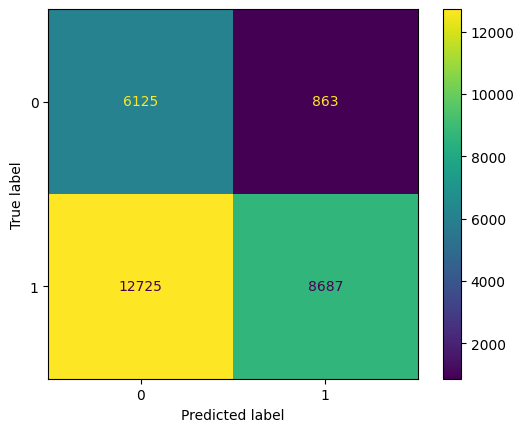

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import warnings

warnings.filterwarnings('ignore')

# Model 1
print("==== MODEL #1 ====")

# Predict probabilities
y1_prob = model.predict(x_val)

decision_level = np.mean(y1_prob)
print(f"Decision Level: {decision_level}")

# Convert probabilities to binary predictions
y1_pred = (y1_prob >= decision_level).astype(int).squeeze()

# Confusion Matrix
cm1 = confusion_matrix(y_val, y1_pred)
disp1 = ConfusionMatrixDisplay(cm1)


# Classification Report
report1 = classification_report(y_val, y1_pred)

displayCM = True

if displayCM:
    disp1.plot()
    print("Classification Report:\n", report1)
else:
    plt.plot(y1_prob)
    plt.show()
    plt.plot(y1_pred)
    plt.show()